In [249]:
from numpy import arange
import numpy as np
from scipy.interpolate import RegularGridInterpolator
import matplotlib.pyplot as plt

def lerp(a, b, t):
    return a + (b - a) * t

def lerp_interval(a, b, resolution=0.1):
    if np.sum(a) > np.sum(b):
        a, b = b, a
    return [lerp(a, b, i) for i in arange(0, 1.1, resolution)]

def row_slice(i, array):
    i = i * 3
    return array[i:i+3]

In [250]:
pts = np.array([
0, 0, 0,
0, 0, 1,
0, 1, 1,
0, 1, 0,
1, 0, 0,
1, 0, 1,
1, 1, 1,
1, 1, 0,
])

tetrahedra = np.array([
4,6,7,
6,4,5,
2,7,6,
6,2,7,
4,6,5,
1,6,5,
7,2,3,
7,0,4,
0,7,3,
6,1,2,
0,5,4,
2,7,0,
3,0,5,
6,1,1,
2,6,0,
5,0,1,
6,0,0,
2,0,3,
0,2,1])

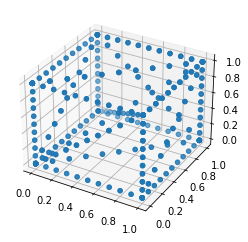

In [252]:
arrs = []
for row in range(0, len(tetrahedra), 3):
    group = tetrahedra[row:row+3]
    
    pt1 = np.array(row_slice(group[0], pts))
    pt2 = np.array(row_slice(group[1], pts))
    pt3 = np.array(row_slice(group[2], pts))
    
    XY = np.array(lerp_interval(pt1, pt2))
    YZ = np.array(lerp_interval(pt2, pt3))
    XZ = np.array(lerp_interval(pt1, pt3))
    
    arrs.append(np.concatenate((XY, YZ, XZ), axis=0))

vals = np.concatenate(arrs, axis=0)
    
x = vals[:, 0]
y = vals[:, 1]
z = vals[:, 2]
    
ax = plt.axes(projection='3d')
ax.scatter(x, y, z)

In [237]:
v = np.ones((101, 101, 101, 2, 101))
v

array([[[[[1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.]],

         [[1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.]],

         [[1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.]],

         ...,

         [[1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.]],

         [[1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.]],

         [[1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.]]],


        [[[1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.]],

         [[1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.]],

         [[1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.]],

         ...,

         [[1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.]],

         [[1., 1., 1., ..., 1., 1., 1.],
          [1., 1., 1., ..., 1., 1., 1.]],

         [[1., 1., 1., ..., 1., 1., 1.],
   